In [3]:
!pip install seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=68c4dffc0d678bf427d9a7d649a21ffd300868060f9b46739a3d06aa896ed256
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [5]:
from google.colab import files
uploaded = files.upload()


Saving NER-test.tsv to NER-test.tsv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving ner_token_predictions.csv to ner_token_predictions.csv


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-score: 0.0967741935483871
              precision    recall  f1-score  support
LOC            0.000000  0.000000  0.000000      0.0
LOCATION       0.000000  0.000000  0.000000      3.0
MISC           0.000000  0.000000  0.000000      0.0
ORG            0.333333  0.375000  0.352941      8.0
PER            0.000000  0.000000  0.000000      0.0
PERSON         0.000000  0.000000  0.000000     12.0
WORK_OF_ART    0.000000  0.000000  0.000000      6.0
micro avg      0.090909  0.103448  0.096774     29.0
macro avg      0.047619  0.053571  0.050420     29.0
weighted avg   0.091954  0.103448  0.097363     29.0


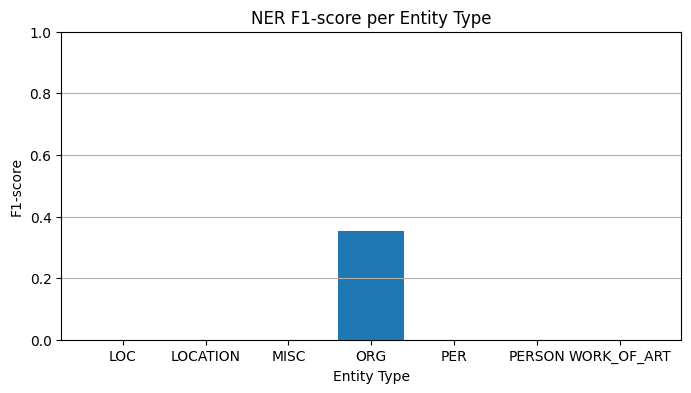

In [9]:
import pandas as pd
from seqeval.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Load predictions
df = pd.read_csv("ner_token_predictions.csv")

# OPTIONAL: Map detailed labels to standard CoNLL-style if needed
label_map = {
    'PERSON': 'PER',
    'LOCATION': 'LOC',
    'ORGANIZATION': 'ORG',
    'WORK_OF_ART': 'MISC',
    'FAC': 'MISC',
    'GPE': 'LOC',
    'NORP': 'MISC',
    'LAW': 'MISC',
    'EVENT': 'MISC',
    'PRODUCT': 'MISC'
}
df['true_label'] = df['true_label'].replace(label_map)
df['predicted_label'] = df['predicted_label'].replace(label_map)


true = df.groupby("sentence_id")["true_label"].apply(list).tolist()
pred = df.groupby("sentence_id")["predicted_label"].apply(list).tolist()

report = classification_report(true, pred, output_dict=True)
print("F1-score:", f1_score(true, pred))
print(pd.DataFrame(report).transpose())


entity_types = [e for e in report.keys() if e not in ['micro avg', 'macro avg', 'weighted avg']]
f1_scores = [report[e]['f1-score'] for e in entity_types]

plt.figure(figsize=(8, 4))
plt.bar(entity_types, f1_scores)
plt.title("NER F1-score per Entity Type")
plt.ylabel("F1-score")
plt.xlabel("Entity Type")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

